In [5]:
import sys
from pathlib import Path
import os 
import pickle
# Add the src/utils directory to sys.path
src_utils_path = Path("../src/utils")
sys.path.append(str(src_utils_path))
import metrics as mjo

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

import numpy as np

In [9]:
fn = '/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/predictions/hov2_all_leads/UNet_A/exp1/OLR_15deg_lead30_lr0.001_batch32_dropout0.3_ch_32_8_ksize_3_hidden_1024_128_opt_SGD_mom0.9_wd0.001_mem29.nc'
bcc, rmse = mjo.get_skill_one_all_leads('ROMI', fn, rule='Iamp>1.0', month_list=None, datesta=None, dateend=None, lead_max=30,
                       Fnmjo = '/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/data/target/romi/ROMI_NOAA_1979to2022.nc')
                       

In [10]:
print(bcc)

[0.82720124 0.8206546  0.81445846 0.80165758 0.77846278 0.76185276
 0.74853624 0.73781018 0.71761288 0.70232144 0.68804665 0.67059575
 0.65996532 0.64539931 0.63588752 0.61818461 0.61658455 0.60934401
 0.59547251 0.57694887 0.56494126 0.55622007 0.52921857 0.52177059
 0.50977512 0.48626732 0.47982543 0.46140314 0.44240091 0.41100815
 0.39191363]


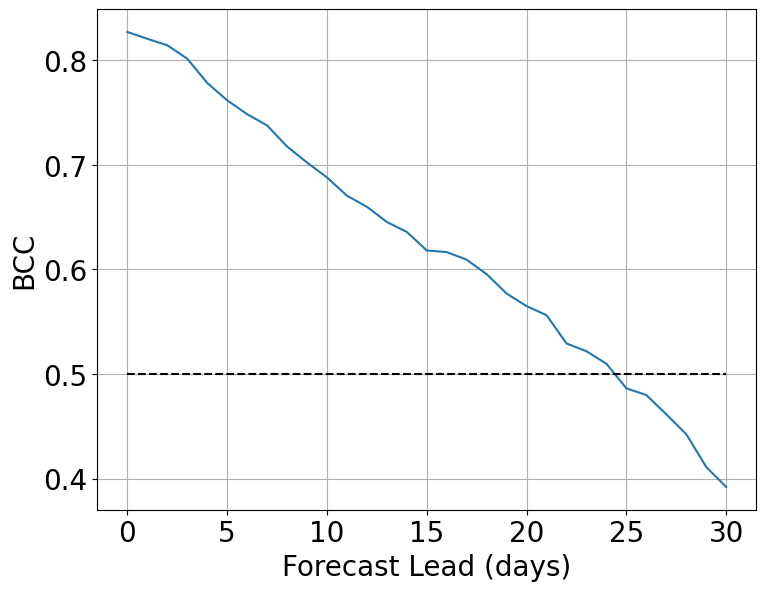

In [11]:
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(1,1,figsize=(8.5,6.5))  
# extract values in bcc_valid
ax.plot(np.arange(0,31),bcc,label='ROMI')
ax.plot(np.arange(0,35,5),[0.5]*len(np.arange(0,35,5)),'k--')
ax.set_xlabel('Forecast Lead (days)')
ax.set_ylabel('BCC')
ax.grid()

In [1]:
fn = '/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/predictions/hov2_all_leads/UNet_A/exp1/OLR_15deg_lead30_lr0.001_batch32_dropout0.3_ch_32_8_ksize_3_hidden_1024_128_opt_SGD_mom0.9_wd0.001_mem29.nc'
import xarray as xr
ds = xr.open_dataset(fn)
ds 

<xarray.Dataset>
Dimensions:      (time: 2132, variable: 62)
Coordinates:
  * time         (time) datetime64[ns] 2010-01-30 2010-01-31 ... 2015-12-01
Dimensions without coordinates: variable
Data variables:
    predictions  (time, variable) float32 ...
    targets      (time, variable) float32 ...

In [3]:
ds['predictions'][0,:].values 

array([-0.13074897, -1.0830904 , -0.01027784, -0.9719447 ,  0.08053091,
       -0.9714186 ,  0.15275927, -0.93491435,  0.2666568 , -0.9196259 ,
        0.6009129 , -0.7927144 ,  0.5776009 , -0.8084732 ,  0.69201326,
       -0.69508237,  0.642557  , -0.6496159 ,  0.77107203, -0.5679217 ,
        0.8069958 , -0.46326774,  0.83411217, -0.40002608,  0.95394415,
       -0.27874437,  0.86922085, -0.12422869,  0.9437515 , -0.1252959 ,
        0.831209  , -0.05883736,  0.804973  , -0.0344369 ,  0.82901365,
        0.15448323,  0.8730275 ,  0.12224644,  0.7647146 ,  0.23609346,
        0.779632  ,  0.34633607,  0.6036109 ,  0.49767363,  0.63037586,
        0.37988836,  0.46062344,  0.55434763,  0.5487925 ,  0.46221262,
        0.31431198,  0.48498684,  0.27364212,  0.6536869 ,  0.22522384,
        0.5534271 ,  0.15661374,  0.5721219 ,  0.1913974 ,  0.53810847,
        0.13004287,  0.6550683 ], dtype=float32)

In [4]:
ds['targets'][0,:].values 

array([-0.81, -2.25, -0.7 , -2.29, -0.51, -2.36, -0.31, -2.4 , -0.19,
       -2.46,  0.  , -2.5 ,  0.25, -2.53,  0.56, -2.58,  0.89, -2.52,
        1.24, -2.41,  1.53, -2.27,  1.69, -2.17,  1.78, -2.08,  1.87,
       -1.96,  1.94, -1.81,  1.98, -1.62,  2.  , -1.39,  1.94, -1.13,
        1.76, -0.83,  1.57, -0.59,  1.36, -0.37,  1.16, -0.16,  0.92,
        0.1 ,  0.6 ,  0.38,  0.3 ,  0.57,  0.05,  0.63, -0.17,  0.61,
       -0.27,  0.49, -0.34,  0.45, -0.41,  0.46, -0.39,  0.48],
      dtype=float32)

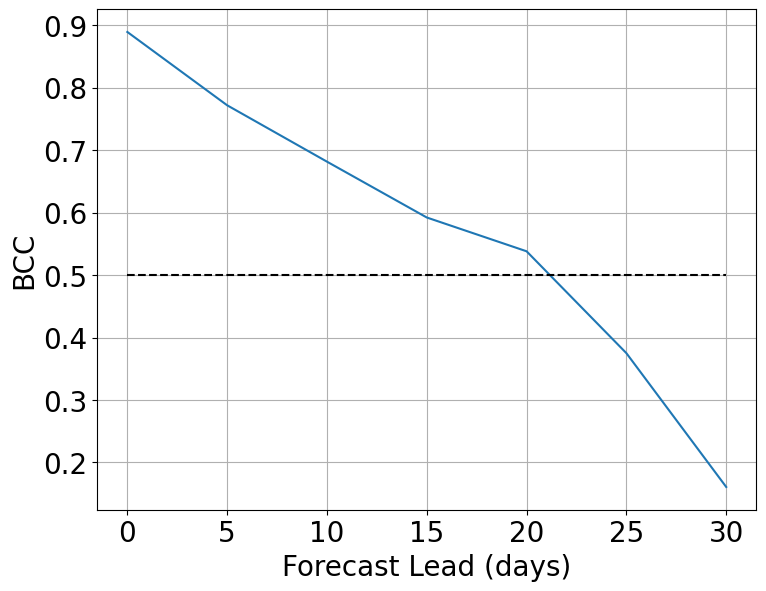

In [3]:
fn_list = mjo.generate_fn_list(
    base_dir = '/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/predictions/hov2/UNet_A',
    lead_list = np.arange(0,35,5),
    exp_list = ['1'],
    lat=15,
    fileflg='*mem29.nc'
)
bcc_valid, _ = mjo.get_skill_parallel('ROMI',fn_list=fn_list, rule='Iamp>1.0', lead_list=np.arange(0,35,5), datesta='2010-01-01', dateend='2015-12-31')
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(1,1,figsize=(8.5,6.5))  
# extract values in bcc_valid
bcc = [bcc_valid[(lead, '1')] for lead in np.arange(0,35,5)]
ax.plot(np.arange(0,35,5),bcc,label='ROMI')
ax.plot(np.arange(0,35,5),[0.5]*len(np.arange(0,35,5)),'k--')
ax.set_xlabel('Forecast Lead (days)')
ax.set_ylabel('BCC')
ax.grid()

In [ ]:
fn_list = mjo.generate_fn_list(
    base_dir = '/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/predictions/hovmoller/UNet_A',
    lead_list = np.arange(0,35,5),
    exp_list = ['1'],
    lat=15,
    fileflg='*mem29.nc'
)


{(0,
  '1'): '/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/predictions/hovmoller/UNet_A/exp1/OLR_15deg_lead0_lr0.0001_batch32_dropout0.3_ch_16_4_ksize_5_hidden_512_64_opt_SGD_mom0.9_wd0.001_mem29.nc',
 (5,
  '1'): '/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/predictions/hovmoller/UNet_A/exp1/OLR_15deg_lead5_lr0.0001_batch32_dropout0.3_ch_16_4_ksize_5_hidden_512_64_opt_SGD_mom0.9_wd0.001_mem29.nc',
 (10,
  '1'): '/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/predictions/hovmoller/UNet_A/exp1/OLR_15deg_lead10_lr0.0001_batch32_dropout0.3_ch_16_4_ksize_5_hidden_512_64_opt_SGD_mom0.9_wd0.001_mem29.nc',
 (15,
  '1'): '/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/predictions/hovmoller/UNet_A/exp1/OLR_15deg_lead15_lr0.0001_batch32_dropout0.3_ch_16_4_ksize_5_hidden_512_64_opt_SGD_mom0.9_wd0.001_mem29.nc',
 (20,
  '1'): '/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/predictions/hovmoller/UNet_A/exp1/OLR_15deg_lead20_lr0.0001_batch32_dropout0.3_ch_16_4_ksize_5_hidden_512_64_opt

In [9]:
bcc_valid, _ = mjo.get_skill_parallel('ROMI',fn_list=fn_list, rule='Iamp>1.0', lead_list=np.arange(0,35,5), datesta='2010-01-01', dateend='2015-12-31')

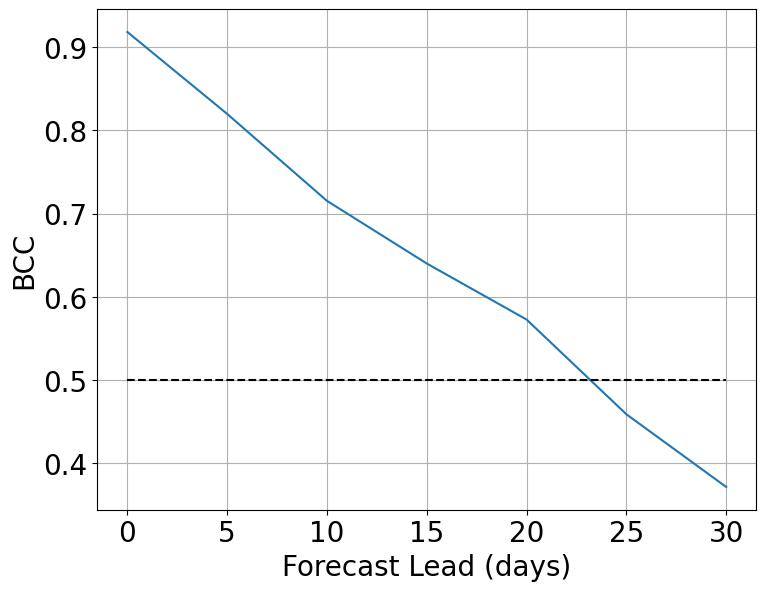

In [20]:
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(1,1,figsize=(8.5,6.5))  
# extract values in bcc_valid
bcc = [bcc_valid[(lead, '1')] for lead in np.arange(0,35,5)]
ax.plot(np.arange(0,35,5),bcc,label='ROMI')
ax.plot(np.arange(0,35,5),[0.5]*len(np.arange(0,35,5)),'k--')
ax.set_xlabel('Forecast Lead (days)')
ax.set_ylabel('BCC')
ax.grid()